<a href="https://colab.research.google.com/github/hungsvdut2k2/ML_Fundamental/blob/main/HousePricePrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! pip install -q kaggle

**Dataset: Housing Dataset**

In [ ]:
from google.colab import files 
datasets = files.upload()

Saving kaggle (1).json to kaggle (1).json


In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [ ]:
!chmod 600 /root/kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d ashydv/housing-dataset

401 - Unauthorized


In [ ]:
!unzip /content/housing-dataset.zip

unzip:  cannot find or open /content/housing-dataset.zip, /content/housing-dataset.zip.zip or /content/housing-dataset.zip.ZIP.


In [ ]:
! kaggle datasets list

401 - Unauthorized


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
from sklearn import preprocessing, svm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [3]:
df = pd.read_csv('/content/Housing.csv',index_col=False)

In [4]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [ ]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


**Since we start with Linear Regression With One Variable,the columns we need to focus on are area and price**

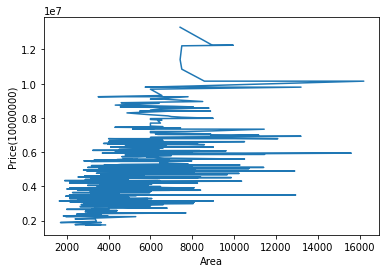

In [ ]:
x = df['area'].to_numpy().reshape(-1, 1)
y = df['price'].to_numpy().reshape(-1, 1)
plt.plot(x, y)
plt.xlabel('Area')
plt.ylabel('Price(10000000)')
plt.show()

**With Linear Regression Model, we need to fit a straight line through all data in dataset**\
So that, our $f(x) = wx + b$\
**To deal with Linear Regression, we can use Gradient Descent**\
The main function is minimizing the cost function $J(w,b) = \frac{1}{2m}\Sigma^{m}_{i=1} ((wx^i + b) - y^i)$ with $(wx+ b)$ is the predicted value of model and y is the true value

$J(w,b) = \frac{1}{2m}\Sigma^{m}_{i=1} ((wx^i + b) - y^i)$\
$\frac{d}{dw}J(w,b) = \frac{1}{m}\Sigma^{m}_{i=1} ((wx^i + b) - y^i)x^i$\
$\frac{d}{db}J(w,b) = \frac{1}{m}\Sigma^{m}_{i=1} ((wx^i + b) - y^i)$

In [ ]:
def loss_function(w, b, x, y):
  m = len(x)
  total_error = np.sum(np.power(np.dot(x, w) - y, 2)) / (2 * m)
  return total_error

In [ ]:
def d_dw(w, b, x, y):
  m = len(x)
  total_value = np.sum(np.dot((np.dot(x, w) - y),x)) / m
  return total_value

In [ ]:
def d_db(w, b, x, y):
  m = len(x)
  total_value = np.sum(np.dot(w, x) - y) / m
  return total_value

In [ ]:
def gradient_descent(w, b, x, y, learning_rate, num_iteration):
  for i in range(num_iteration):
    temp_w = w - learning_rate * d_dw(w, b, x, y)
    temp_b = b - learning_rate * d_db(w, b, x, y)
    w = temp_w
    b = temp_b
    print(d_dw(w, b, x, y), d_db(w, b, x, y))
  return w,b

In [ ]:
regr = LinearRegression()
regr.fit(x, y)

LinearRegression()

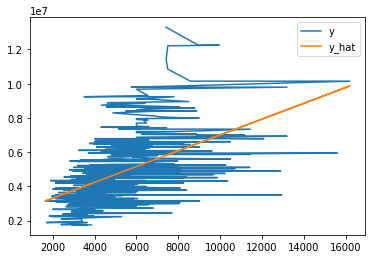

In [ ]:
y_predicted = regr.predict(x)
plt.plot(x, y, label = 'y')
plt.plot(x, y_predicted, label = 'y_hat')
plt.legend()
plt.show()

**Linear Regression with one variable can't fit all data**

**To evaluate our model, we can use Multivariate Linear Regression**

**Suppose features are element in a vector x and vector w contain all parameters. With x0 = 1:** 
$ w * x^T = y =>
\begin{bmatrix}
w0\\
...\\
wn
\end{bmatrix}$ *
$\begin{bmatrix}
x0 && ... && xn
\end{bmatrix} = y$

In [30]:
def compute_value(w, x):
  return np.sum(w * x)

In [ ]:
def compute_loss(y_hat, y):
  return (y_hat - y) ** 2

**The derivative equation of all parameters:**
$\frac{d}{dwi}J(w) = x[i] * (ŷ - y) ^ 2$

In [ ]:
def update_parameters(w, features, learning_rate, y):
  y_hat = compute_value(features, w)
  loss = compute_loss(y_hat, y)
  for i in range(len(w)):
    #w[i] -= features[i] * loss * learning_rate
    print(w[i])
  return w

In [ ]:
def gradient_descent_with_multi_variables(x, y, learning_rate, epochs_max):
  #set all parameters equal to 0
  w = np.array([0 for i in range(y.shape[1] + 1)])
  loss_values = []
  for i in range(epochs_max):
    loss_value = 0
    for j in range(len(x)):
      x_value = np.array(1)
      features = np.append(x_value, x[j])
      y_hat = compute_value(features, w)
      loss_value += compute_loss(y_hat, y[i])
      loss_values.append(loss_value)
      w = update_parameters(w, features, learning_rate, y[j])
  return w, loss_values

**Using Mean Normalization for casting values to the same calculation unit**

In [6]:
def mean_normalization(vector):
  max = np.max(vector)
  min = np.min(vector)
  mean = np.mean(vector)
  vector = (vector - mean) / (max - min) 
  return vector

In [7]:
data = df.iloc[:, 1:5]
for column in data:
  vector = data[column]
  data[column] = mean_normalization(vector)
print(data)
y = df.loc[:, 'price']
y = mean_normalization(y)
np_data = data.to_numpy()
np_y = data.to_numpy()
print(y)

         area  bedrooms  bathrooms   stories
0    0.155977  0.206972   0.237920  0.398165
1    0.261818  0.206972   0.904587  0.731498
2    0.330547  0.006972   0.237920  0.064832
3    0.161475  0.206972   0.237920  0.064832
4    0.155977  0.206972  -0.095413  0.064832
..        ...       ...        ...       ...
540 -0.147804 -0.193028  -0.095413 -0.268502
541 -0.189041  0.006972  -0.095413 -0.268502
542 -0.105192 -0.193028  -0.095413 -0.268502
543 -0.153989  0.006972  -0.095413 -0.268502
544 -0.089384  0.006972  -0.095413  0.064832

[545 rows x 4 columns]
0      0.738811
1      0.647902
2      0.647902
3      0.644872
4      0.575175
         ...   
540   -0.255128
541   -0.259704
542   -0.261189
543   -0.261189
544   -0.261189
Name: price, Length: 545, dtype: float64


**Normal Equation:**\
$w = (X X^T) ^ -1 * X^TY$

In [25]:
def normal_equation(x, y):
  x_transpose = np.transpose(x)
  x_transpose_multiply_x = np.dot(x_transpose, x)
  x_transpose_multiply_y = np.dot(x_transpose, y)
  return np.dot(np.linalg.inv(x_transpose_multiply_x), x_transpose_multiply_y)

In [18]:
new_data = df.iloc[:, 1:5]
x = []
#create matrix x
for i in range(len(new_data)):
  vector = new_data.iloc[i].to_list()
  new_vector = []
  new_vector.append(1)
  for value in vector:
    new_vector.append(value)
  x.append(new_vector)
np_x = np.array(x)
y = y = df.loc[:, 'price'].to_numpy()

In [28]:
res_parameters = normal_equation(np_x, y)
print(res_parameters)

[-2.82091290e+05  3.80024429e+02  1.98295494e+05  1.20018047e+06
  5.31595009e+05]


In [31]:
test_values = []
for i in range(len(new_data)):
  vector = new_data.iloc[i].to_list()
  new_vector = []
  new_vector.append(1)
  for value in vector:
    new_vector.append(value)
  test_value = compute_value(res_parameters, new_vector)
  test_values.append(test_value)

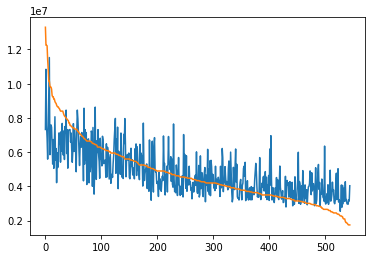

In [33]:
x_axis = [i for i in range(len(y))]
plt.plot(x_axis, test_values, label = 'predicted-value')
plt.plot(x_axis, y, label = 'true-value')
plt.show()